# Weather forecast adatkészlet vizsgálata

Célunk: a több, mint 2600 időjárás-megfigyelést tartalmazó adathalmaz feldolgozásával szeretnénk előrejelzést adni csapadék előfordulására, figyelembe véve a különböző időjárási körülményeket. A gépi tanulás osztályozási technikáit használjuk az elemzéshez. A Scikit-learn Python könyvtárból a logisztikus regresszió, a döntési fa és számos más algoritmus alkalmazásával, valamint különböző adatvizualizálási eszközökkel dolgozunk.

A megfigyelési adatsorok felvételének dátuma és időpontja nem ismert, de azt tudjuk, hogy az adatok időrendi sorrendben vannak. Néhány esetben az adatok hiányosak vagy tévedésből többszörösen rögzítettek lehetnek. Az első oszlopban az adott mérés sorszáma szerepel (Id). Az adatállomány a következő időjárási jellemzők mért értékeit tartalmazza:

Temperature: hőmérséklet (Celsius fok)

Humidity: a levegő páratartalma (%-ban megadva)

Wind_Speed: a szél erőssége (km/h)

Cloud_Cover: az égbolt felhővel való fedettsége (%-ban megadva)  

Pressure: a légnyomás értéke (hPa)

UV_Index: az ultraibolya sugárzás mértéke (valós számként megadva)

Wind_Direction: a szélirány, az égtájak angol kezdőbetűivel megadva

Rain: 'rain', ha esik az eső ill. 'no rain', ha nem esik az eső.


## Adatok beolvasása DataFrame-be


Első lépésként importáljuk a Numpy, Pandas, Seaborn és Matplotlib.pyplot könyvtárakat az adatbeolvasáshoz, adatelőkészítéshez és adatvizualizációhoz, használva a szokásos rövidítéseket az egyes könyvtárakhoz (np, pd, sns és plt).

In [61]:
# A szükséges könyvtárak importálása
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Adatok betöltése és betekintés a DataFrame-be

Töltsük be a weather_forecast_data nevű CSV adatfájlunk tartalmát egy df nevű DataFrame-be, és jelenítsük meg a df első 5 és utolsó 5 darab sorát.

Ezek után meg kell vizsgálnunk, hogy szükséges-e adattisztítási lépéseket elvégeznünk.

In [62]:
# Adatok beolvasása és megjelenítése
df = pd.read_csv('/content/weather_forecast_data.csv')
df

,Id,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Additional_Information,UV_Index,Wind_Direction,Rain
0,1,23.720338,89.592641,7.335604,50.501694,1032.378759,NaN,5.862515,SE,rain
1,2,27.879734,46.489704,5.952484,4.990053,992.614190,NaN,1.311351,E,no rain
2,3,25.069084,83.072843,1.371992,14.855784,1007.231620,NaN,2.297924,N,no rain
3,1,23.720338,89.592641,7.335604,50.501694,1032.378759,NaN,5.862515,SE,rain
4,5,NaN,89.592641,7.335604,50.501694,1032.378759,NaN,5.862515,SE,rain
...,...,...,...,...,...,...,...,...,...,...
2644,2545,23.976170,77.144515,16.145567,84.636004,1010.286784,NaN,9.275946,NW,rain
2645,2546,22.780079,46.163250,4.999834,54.831934,983.214289,NaN,6.295539,E,no rain
2646,2547,29.847710,87.348236,3.295808,99.137103,1016.720300,NaN,10.726056,NE,no rain
2647,2548,20.588745,59.436831,3.810290,90.471117,1033.728861,NaN,9.859457,NE,no rain


Írassuk ki, hogy hány adatsorunk van a dataFrame-ben.

In [63]:
# Adatsorok száma
len(df)

2649

Írassuk ki azt az információt, amely megadja azt, hogy az oszlopokban milyen típusú értékek szerepelnek, valamint megmutatja az oszlopokban szereplő NaN értékek számát is.

In [64]:
# Informácó a DataFrame adatairól
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2649 entries, 0 to 2648
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      2649 non-null   int64  
 1   Temperature             2647 non-null   float64
 2   Humidity                2649 non-null   float64
 3   Wind_Speed              2647 non-null   float64
 4   Cloud_Cover             2649 non-null   float64
 5   Pressure                2649 non-null   float64
 6   Additional_Information  0 non-null      float64
 7   UV_Index                2648 non-null   float64
 8   Wind_Direction          2648 non-null   object 
 9   Rain                    2644 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 207.1+ KB


Ellenőrizzük az isnull().sum() metódussal, hogy melyik oszlopban hány darab NaN érték található.

In [65]:
# Oszloponként a NaN értékek darabszáma
df.isnull().sum()

,0
Id,0
Temperature,2
Humidity,0
Wind_Speed,2
Cloud_Cover,0
Pressure,0
Additional_Information,2649
UV_Index,1
Wind_Direction,1
Rain,5


## Adattisztítás


Töröljük ki a kizárólag NaN-t tartalmazó DataFrame 'Additional_Information' nevű oszlopát, valamint törüljük ki az 'Id' nevű oszlopot is. Ellenőrizzük, hogy sikeres volt-e a törlés.

In [66]:
# A fölösleges oszlopok eltávolítása
del df['Additional_Information']
del df['Id']
df.columns

Index(['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure',
       'UV_Index', 'Wind_Direction', 'Rain'],
      dtype='object')

Írjuk ki, hogy ezek után összesen hány helyen van hiányzó adat a DataFrame-ben.

In [67]:
# Összesen hány darab NaN érték van
df.isnull().sum().sum()

np.int64(11)

Mivel számottevően nem fog módosulni az adatmennyiség, ezért töröljük ki a NaN értékeket tartalmazó sorokat.

Töröljük ki a duplikált sorokat is (ha vannak ilyenek).

Írassuk ki az adattisztítási lépések után, hogy hány sor található a DataFrame-ben.

In [68]:
# A NaN értékeket tartalmazó sorok és a duplikált sorok törlése
df = df.dropna()
df = df.drop_duplicates()
len(df)

2525

## Adatok megjelenítése különböző szempontok szerint - Adatvizualizáció

Alkalmazzuk a Seaborn könyvtár különböző diagramkészítő metódusait hisztogramok, boxplot-ok, vonal- és scatter diagramok valamint egyéb megjelenítési lehetőségek bemutatására.

1. Jelenítsük meg a Seaborn könyvtár countplot() metódusával az esős ill. a nem esős napok számát.


Állítsuk be színpalettának a blue és gold színeket (az esős ill. a napos oszlopra vonatkozóan).
A megadott kódban szereplő ?-ek helyére írjuk be a hiányzó kódrészletet.

<ipython-input-69-d997d4e2fd4e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rain', data=df, palette=['blue', 'gold'])


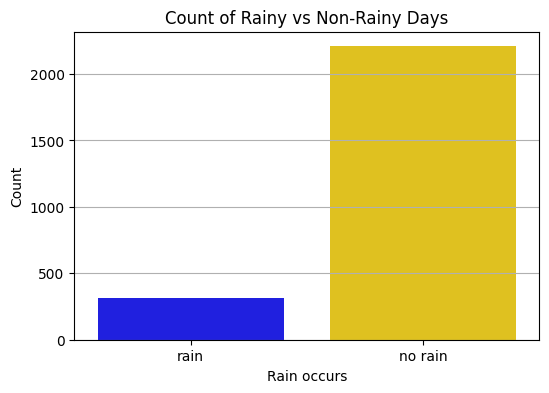

In [69]:
# Az esős ill. a nem esős napok számának megjelenítése
plt.figure(figsize=(6, 4))
sns.countplot(x='Rain', data=df, palette=['blue', 'gold'])
plt.title('Count of Rainy vs Non-Rainy Days')
plt.xlabel('Rain occurs')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

2. A felhővel borítottság vizsgálata a 'Cloud_Cover' oszlop adatai alapján.

Ehhez illesszünk egy új oszlopot a DataFrame-hez 'Outlook' névvel. Ebben jelenjen meg a 'Sunny' kifejezés, ha a felhővel fedettség 15%-nál kisebb, a 'Very_Cloudy' érték ha 70%-nál nagyobb és az 'Overcast' az egyéb esetekben. Kiíratással ellenőrizzük a művelet sikerességét.

In [70]:
# Az Outlook oszlop generálása
df['Outlook'] = df['Cloud_Cover'].apply(lambda x: 'Sunny' if x < 15 else ('Very_Cloudy' if x > 70 else 'Overcast'))

A megjelenítéshez két diagramot helyezzünk el egy ábrába a Matplotlib subplots() metódusával. Az első diagramon a felhővel borítottságot jelenítjük meg a Seaborn countplot() metódusával az Outlook oszlop elemeire, vízszintes rácsvonalakkal. A színpalettát állítsuk be az orange (Sunny), darkgrey (Very_cloudy) és skyblue (Overcast) értékekre. A második legyen egy osztott oszlopdiagram, amelyen azt jelenítsük meg, hogy a Sunny napokon hányszor volt eső és hányszor nem volt, illetve az Overcast napokon és a Very_Cloudy napokon is ugyanezt. Itt a színpalettának a blue és gold színeket válasszuk ki (az esős ill. a napos oszlopra vonatkozóan).
A megadott kódban szereplő ?-ek helyére írjuk be a hiányzó kódrészletet.

<ipython-input-71-ef9a72bf6d48>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0], x='Outlook', data=df, palette=['orange', 'darkgrey', 'skyblue'])


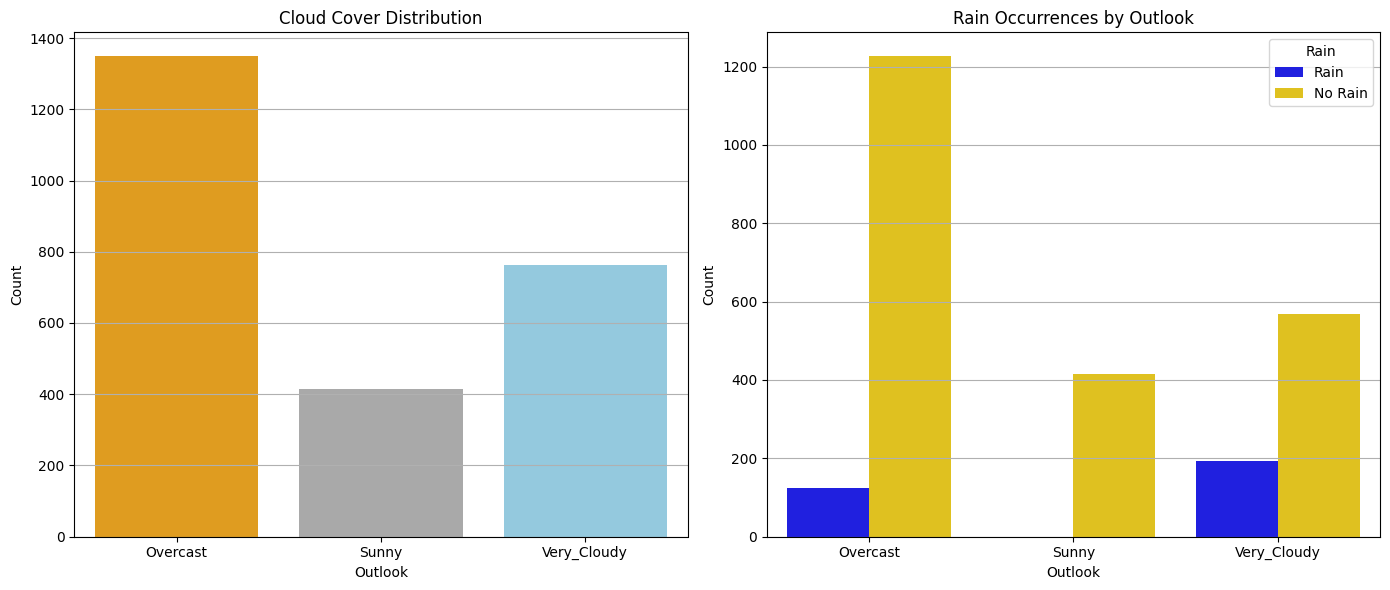

In [71]:
# Subplot létrehozása két diagramhoz
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Az első diagram
sns.countplot(ax=axes[0], x='Outlook', data=df, palette=['orange', 'darkgrey', 'skyblue'])
axes[0].set_title('Cloud Cover Distribution')
axes[0].set_xlabel('Outlook')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y')

# A második diagram
sns.countplot(ax=axes[1], x='Outlook', hue='Rain', data=df, palette=['blue', 'gold'])
axes[1].set_title('Rain Occurrences by Outlook')
axes[1].set_xlabel('Outlook')
axes[1].set_ylabel('Count')
axes[1].legend(title='Rain', labels=['Rain', 'No Rain'])
axes[1].grid(axis='y')

# Megjelenítés
plt.tight_layout()
plt.show()

3. Az adatok eloszlásának megjelenítése

Jelenítsük meg 2 soros és 3 oszlopos többszörös diagramként (subplot) a hőmérséklet, páratartalom, szélsebesség, felhővel borítottság, légnyomás és az UV index értékek gyakoriságát a Seaborn histplot() metódusával, amellyel a KDE adatsűrűségi görbét is kirajzoljuk. Az adattartományt minden esetben 30 sávra osszuk fel.
A megadott kódban a ?-ek helyére írjuk be amegfelelő értékeket.

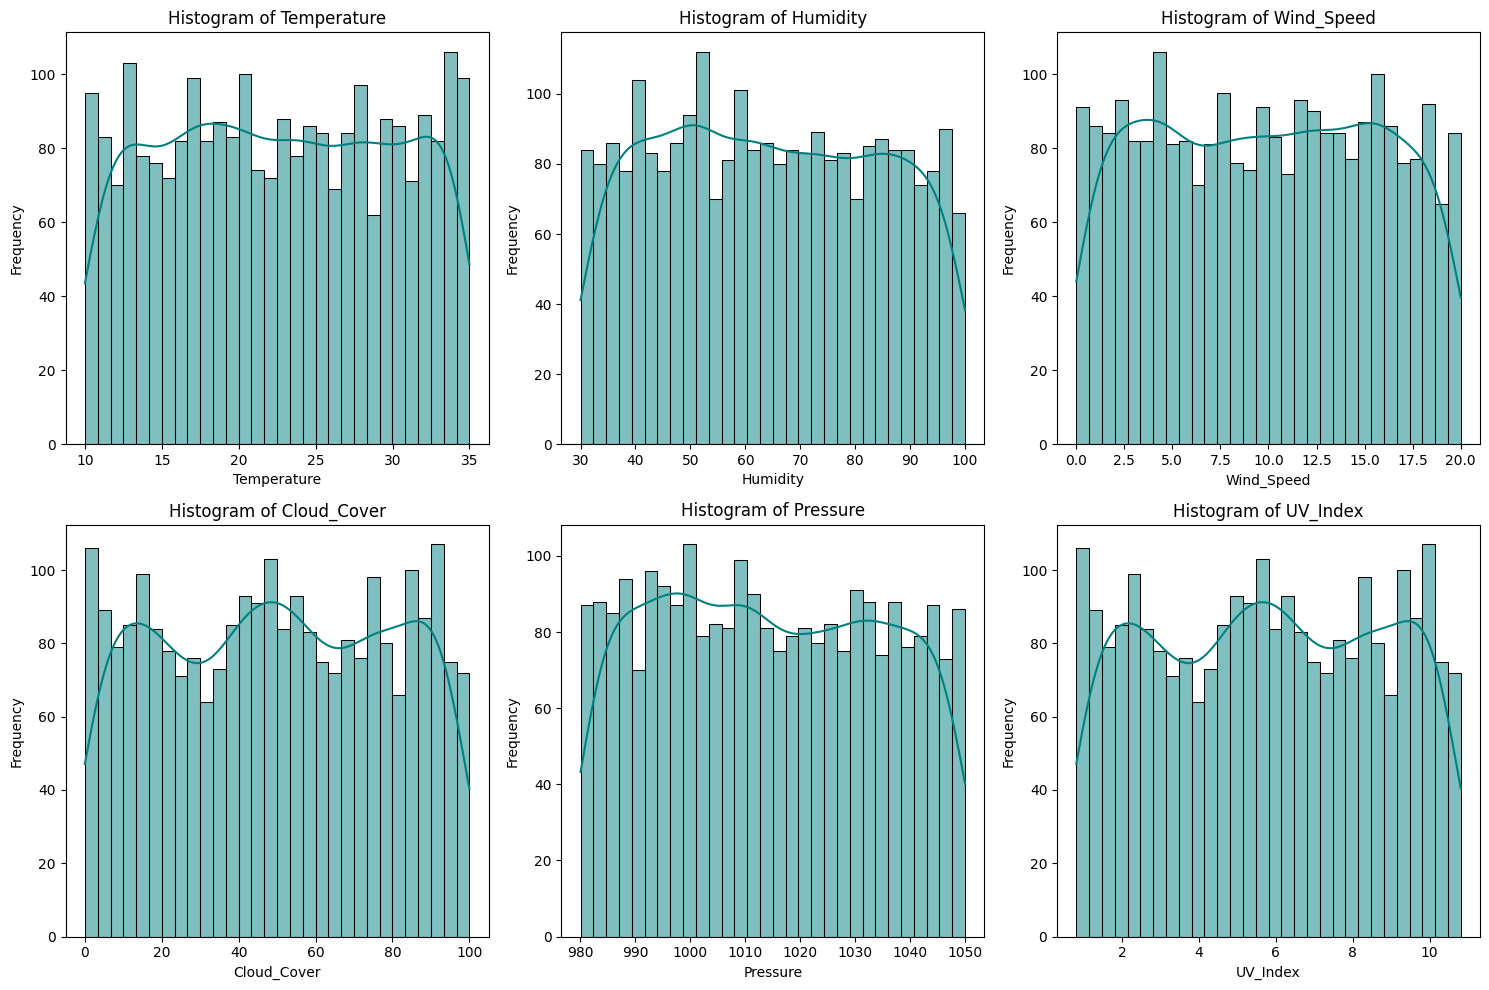

In [72]:
#Hisztogramok megjelenítése a Temperature, Humidity, Wind Speed, Cloud Cover, Pressure és UV_Index oszlopokra KDE-vel
plt.figure(figsize=(15, 10))
features = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure', 'UV_Index']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=30, color='teal')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

4. Statisztika készítése és megjelenítése


Határozzuk meg a DataFrame numerikus oszlopainak statisztikai jellemzőit a describe() metódussal.

In [73]:
# Statisztikai táblázat a numerikus adatokra
df.describe()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,UV_Index
count,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000,2525.000000
mean,22.588472,64.370080,9.899234,49.683450,1014.340622,5.780691
std,7.322367,19.967218,5.780565,29.137101,20.184971,2.913710
min,10.001842,30.005071,0.009819,0.015038,980.014486,0.813849
25%,16.381613,47.345752,4.758482,23.905690,997.005235,3.202915
50%,22.552640,63.951823,9.882730,49.450834,1013.434795,5.757429
75%,28.959466,81.563676,14.947018,75.399653,1031.759926,8.352311
max,34.995214,99.997481,19.999132,99.997795,1049.985593,10.812125


Jelenítsük meg egy 3 soros és 2 oszlopos elrendezésű subplot-ban a numerikus oszlopok terjedelmét, mediánját és kvartiliseit a Seaborn boxplot diagramjával.

A boxplot-okat minden esetben a Rain oszlop értékei szerinti csoportosításban, skyblue és tomato színekkel ábrázoljuk.
Írjuk be a ?-ek helyére a hiányzó kulcssszavakat és paramétereket.

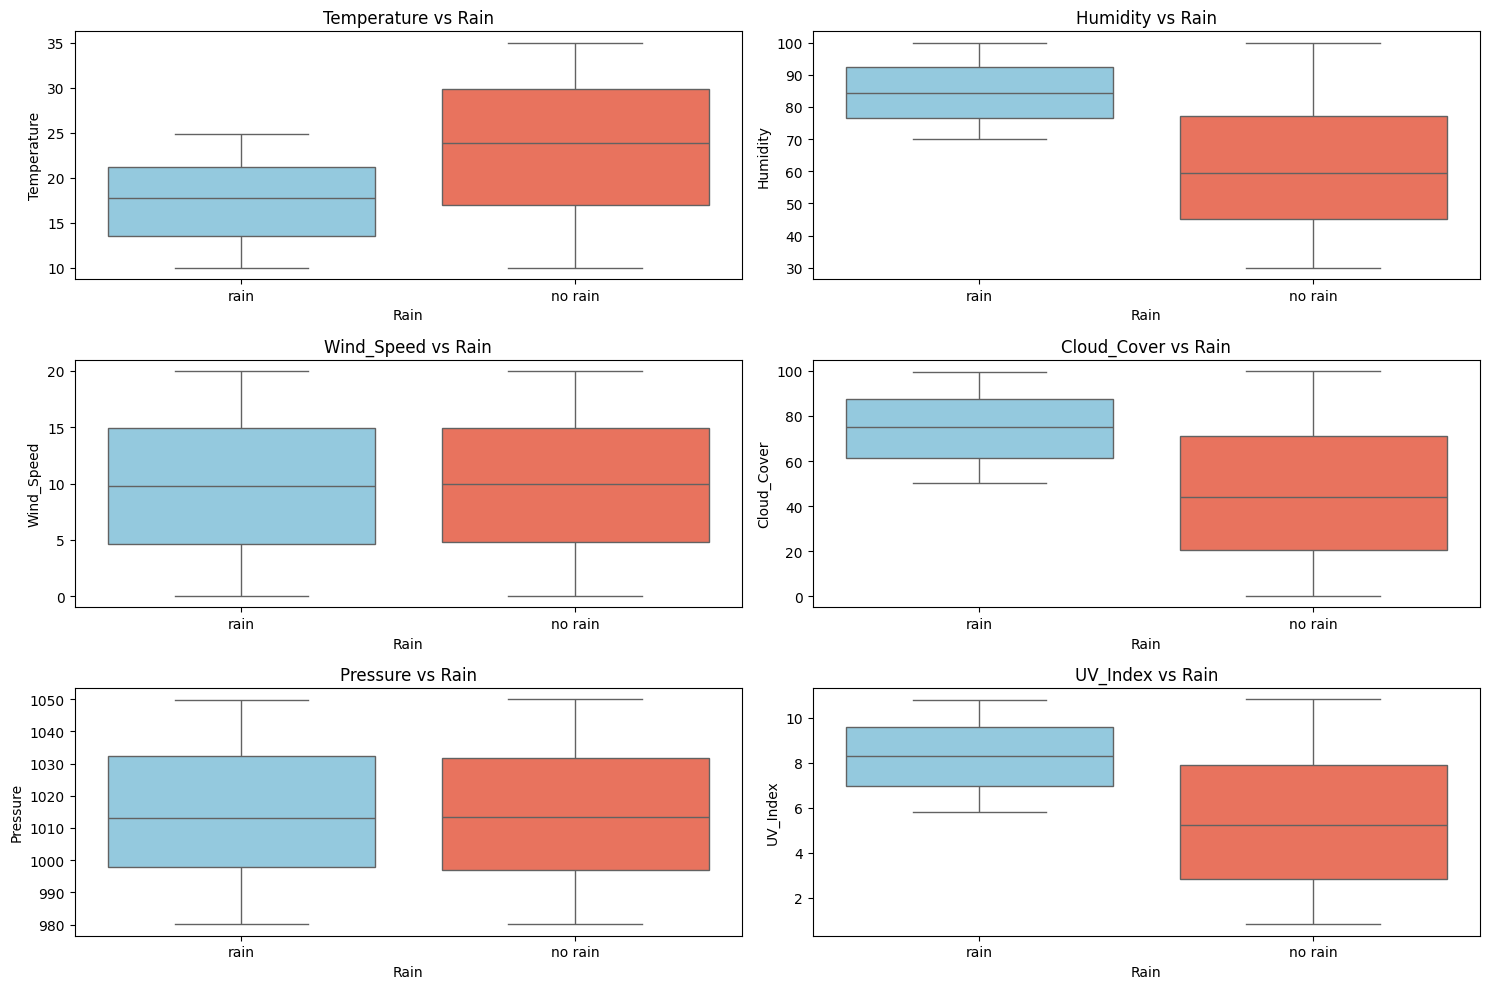

In [74]:
# Boxplot-ok megjelenítése a Temperature, Humidity, Wind Speed, Cloud Cover, Pressure és UV_Index oszlopokra Rain szerinti csoportosítással
plt.figure(figsize=(15, 10))

for i, column in enumerate(df.columns[:-3]):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='Rain', y=column, data=df, hue='Rain', palette=['skyblue','tomato'])
    plt.title(f'{column} vs Rain')

plt.tight_layout()
plt.show()

5. Az adatok közötti kapcsolatok megjelenítése


Ebben a részben további adatmegjelenítési lehetőségeket mutatunk be. Scatter diagram és vonaldiagram bemutatásával tesszük szemléletessé az adatainkat.

Első lépésként jelenítsük meg a DataFrame hőmérséklet, páratartalom, légnyomás és felhővel borítottság értékeit a Seaborn pairplot() metódusával coolwarm színpalettával a Rain oszlop értékei szerinti csoportosításban.
A ?-ek helyére írjuk be a hiányzó kódrészleteket.

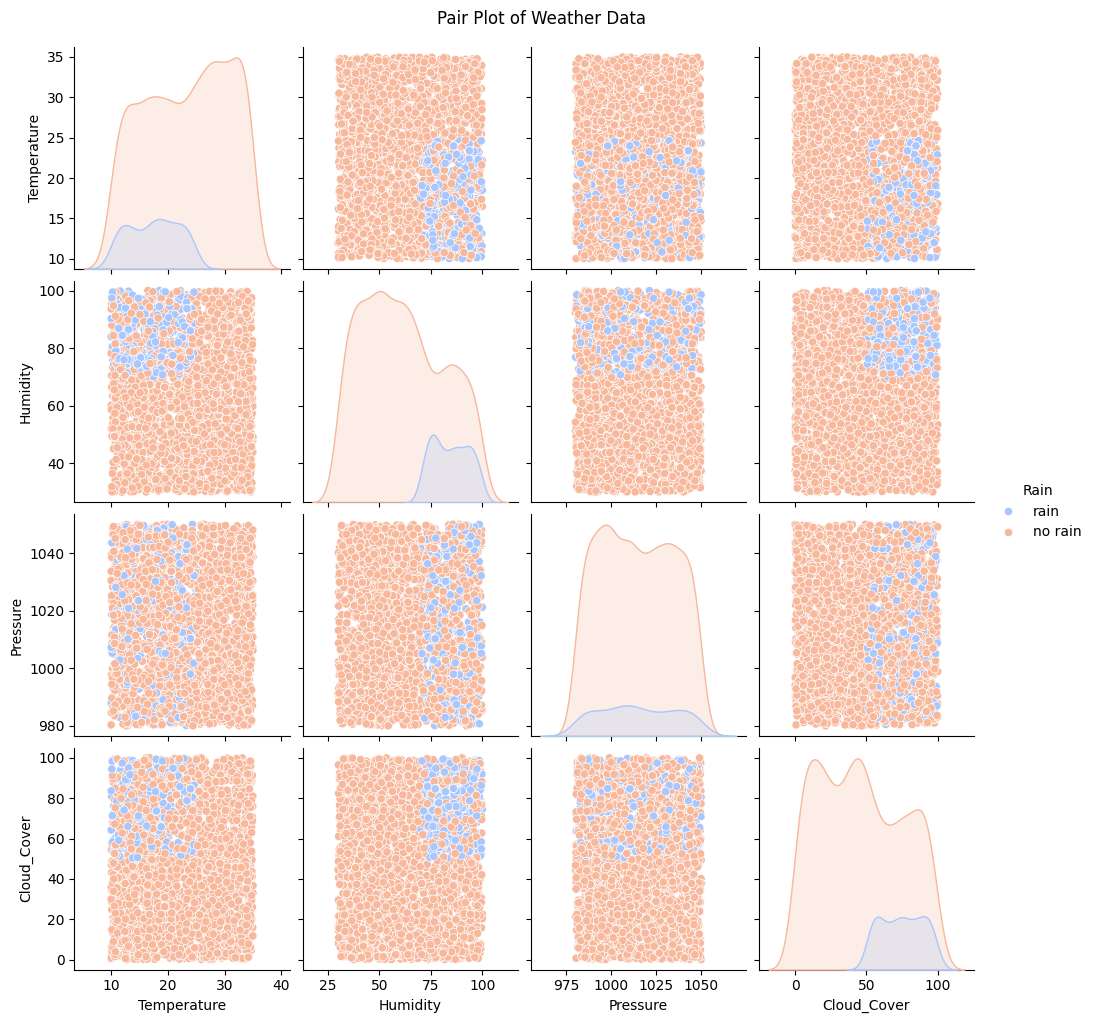

In [75]:
# Pairplot diagram ábrázolása a Rain oszlop szerinti csoportosítással
df_select = df[['Temperature', 'Humidity', 'Pressure', 'Cloud_Cover','Rain']]
sns.pairplot(df_select, hue='Rain', palette='coolwarm')
plt.suptitle('Pair Plot of Weather Data', y=1.02)
plt.show()

Rajzoljunk overlay vonaldiagramot a szélerősség és a páratartalom mérésenkénti értékeinek bemutatásásra. Használjuk a Matplotlib könyvtár plot metódusát a két grafikon közös diagramban történő ábrázolásához. Használjuk a Humidity oszlop értékeinek megjelenítéséhez a lightgreen, a Wind_Speed-hez pedig az orchid színt és írjuk be a hiányzó kódrészleteket a ?-ek helyére.

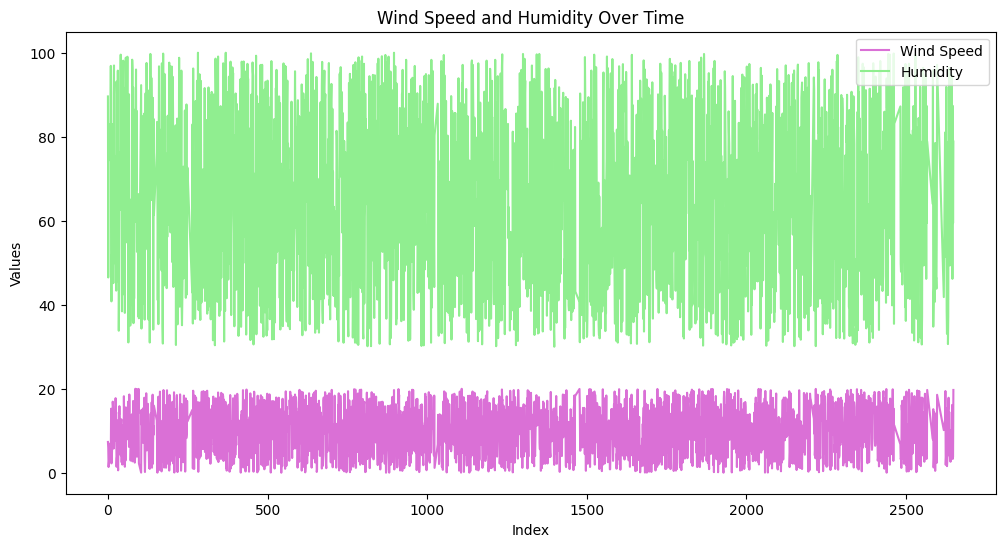

In [76]:
# Vonaldiagram: a Temperature és a Humidity megjelenítése az Index oszlop szerinti sorrendben
plt.figure(figsize=(12, 6))

# Temperature line plot
plt.plot(df.index, df['Wind_Speed'], label='Wind Speed', color='orchid')
plt.plot(df.index, df['Humidity'], label='Humidity', color='lightgreen')

plt.title('Wind Speed and Humidity Over Time')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

Jelenítsük meg a szélerősség és a páratartalom közti kapcsolatot a Seaborn scatterplot() és kdeplot() metódusaival a Rain oszlop értékei szerinti bontásban.
helyezzük el egy 1 sor 2 oszlopos subplot-ban a két diagramot.

A ?-ek helyére írjuk be a hiányzó kódrészleteket.

<Axes: title={'center': 'Wind Speed and Humidity'}, xlabel='Wind_Speed', ylabel='Humidity'>

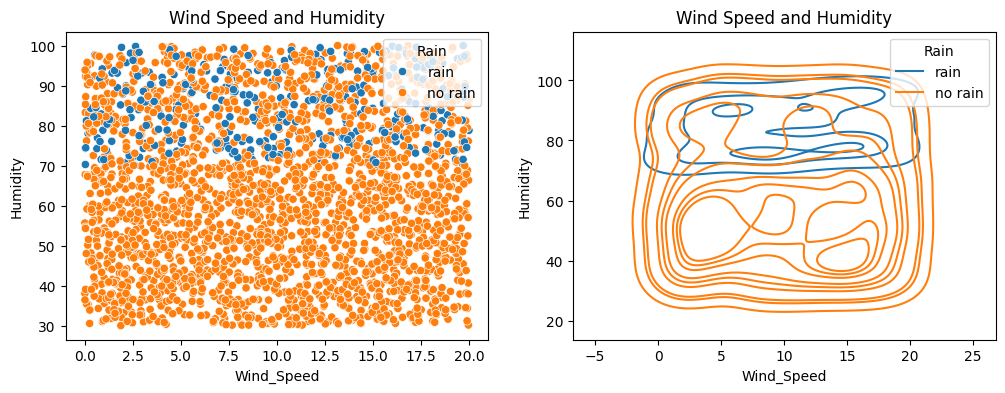

In [77]:
# Scatter diagram és KDE diagram a Wind_Speed és a Humidity értékek kapcsolatára
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Wind Speed and Humidity')
sns.scatterplot(x=df['Wind_Speed'],y=df['Humidity'],hue=df['Rain'])

plt.subplot(1,2,2)
plt.title('Wind Speed and Humidity')
sns.kdeplot(x=df['Wind_Speed'],y=df['Humidity'],hue=df['Rain'])

## A DataFrame mentése CSV fájlba

Mentsük el a vizsgált df DataFrame-et a cleaned_weather_data.csv fájlba a Pandas to_csv() metódusával, az Index oszlop mellőzésével.

In [78]:
# df mentése CSV fájlba
df.to_csv('cleaned_weather_data.csv', index=False)

## Korreláció vizsgálata
A korreláció vizsgálatához készítsünk egy df_new új DataFrame-et a cleaned_weather_data.csv adatainak beolvasásával.

A df_new DataFrame-et egészítsük ki egy új Rain_code nevű oszloppal, amelybe írjuk be az 1 értéket ha esett az eső, ill. a 0 értéket, ha nem esett az eső.

Írjuk be a ?-ek helyére a hiányzó kódrészleteket. Jelenítsük meg a new_df első 10 adatsorát.

In [79]:
# Adatok beolvasása és a Rain_code oszlop feltöltése
df_new = pd.read_csv('/content/cleaned_weather_data.csv')
df_new['Rain_code'] = df_new['Rain'].apply(lambda x: 1 if x == 'rain' else 0)
df_new.head(10)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,UV_Index,Wind_Direction,Rain,Outlook,Rain_code
0,23.720338,89.592641,7.335604,50.501694,1032.378759,5.862515,SE,rain,Overcast,1
1,27.879734,46.489704,5.952484,4.990053,992.614190,1.311351,E,no rain,Sunny,0
2,25.069084,83.072843,1.371992,14.855784,1007.231620,2.297924,N,no rain,Sunny,0
3,23.622080,74.367758,7.050551,67.255282,982.632013,7.537874,SE,rain,Overcast,1
4,20.591370,96.858822,4.643921,47.676444,980.825142,5.579990,E,no rain,Overcast,0
5,26.147353,48.217260,15.258547,59.766279,1049.738751,6.788974,NW,no rain,Overcast,0
6,20.939680,40.799444,2.232566,45.827508,1014.173766,5.395097,NE,no rain,Overcast,0
7,32.294325,51.848471,2.873621,92.551497,1006.041733,10.067495,NE,no rain,Very_Cloudy,0
8,34.091569,48.057114,5.570206,82.524873,993.732047,9.064833,E,no rain,Very_Cloudy,0
9,19.586038,82.978293,5.760537,98.014450,1036.503457,10.613791,E,rain,Very_Cloudy,1


A df_new DataFrame-ben töröljük ki a nem numerikus értékeket tartalmazó oszlopokat, és hozzuk létre a df_new korrelációs mátrixát egy heatmap diagrammal együtt.

In [80]:
del df_new['Wind_Direction']
del df_new['Rain']
del df_new['Outlook']

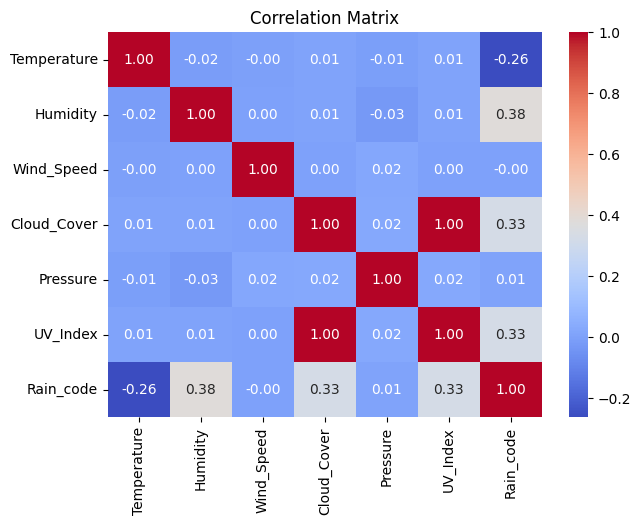

In [81]:
plt.figure(figsize=(7, 5))
sns.heatmap(df_new.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Modellépítés


Elemezzük az adatainkat különböző gépi tanulási algoritmusokkal, hogy előrejelzéseket tudjunk adni a csapadék előfordulására, és hogy feltárjunk esetleges rejtett összefüggéseket az adatok között.
Különböző Sklearn modelleket választunk, ezeket betanítjuk, majd bemutatjuk a pontosságukat. Az eredményeket különböző típusú diagramokon jelenítjük meg.

## A modellépítés lépései:
Importáljuk a szükséges modulokat.
A weather_data nevű új DataFrame-be betöltjük a cleaned_weather_data.csv fájl adatait.
Először kitöröljük az UV_Index, Wind_Direction és Outlook oszlopokatt, amelyeket az elemzésben nem kívánunk felhasználni. Következő lépésben konvertáljuk a szöveges adatokat tartalmazó Rain oszlopot numerikussá. Megadjuk a bemeneti halmazt (X), ezek a mért időjárási tényezők és a célértékeket (y) is, ezek a Rain oszlop értékei.

Ezután következik a weather_data DataFrame adatainak felosztása tanító és teszt (train - test) halmazokra 70% és 30% arányban. A bemeneti X_train és X_test halmazokból a StandardScaler modul alkalmazásával skálázott adathalmazokat is készítünk.



In [82]:
# Importálás, adatbetöltés, típuskonvertálás, adatfelosztások, adatskálázás
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Adatok betöltése
#weather_data = pd.read_csv('/content/weather_forecast_data.csv')
weather_data = pd.read_csv('/content/cleaned_weather_data.csv')
del weather_data['UV_Index']
del weather_data['Wind_Direction']
del weather_data['Outlook']


# A Rain oszlop adatainak numerikussá alakítása
le = LabelEncoder()
weather_data['Rain'] = le.fit_transform(weather_data['Rain'])


# Adatfelosztás jellemzők (X = features) és célértékek (y = target) szerint
X = weather_data.drop('Rain', axis=1)
y = weather_data['Rain']

# Az adatok felosztása tanító és teszt halmazra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Skálázzuk a bemeneti (X) jellemzőket
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## A modell alkalmazása

A kiválasztott  ML modellre következik a modell betanítása, az eredmények kiírása, a modell értékelése és az eredmények megjelenítése.

A modellek értékeléséhez megadjuk a pontosságot (accuracy), a konfúziós mátrixot, és megjelenítjük a további metrikák szerinti értékelést is (precision, recall,f1-score,support) a classification_report() metódussal.

A megjelenítéshez mindig az adott modellre jellemző diagramtípus kerül kiválasztásra.

### 1. modell: Logistic Regression

Ezt a modellt a skálázott bemeneti adatokra alkalmazzuk. A tanítást a fit() metódussal végezzük el a bemeneti train halmazra, és a predict() metódussal adunk előrejelzést a kívánt célértékekre.



In [83]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)

# Logistic Regression értékelése
print("Logistic Regression Metrics:")
print(f"  Accuracy: {accuracy_score(y_test, log_reg_pred):.2f}")
print(f"  Confusion Matrix:\n {confusion_matrix(y_test, log_reg_pred)}")
print(classification_report(y_test , log_reg.predict(X_test_scaled)))

Logistic Regression Metrics:
  Accuracy: 0.93
  Confusion Matrix:
 [[644  26]
 [ 30  58]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       670
           1       0.69      0.66      0.67        88

    accuracy                           0.93       758
   macro avg       0.82      0.81      0.82       758
weighted avg       0.92      0.93      0.93       758



A megjelenítést a ROC görbe megrajzolásával végezzük el.

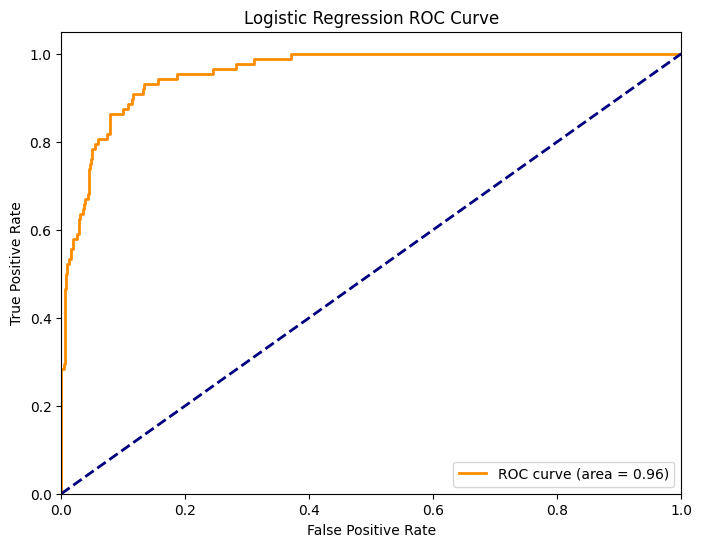

In [84]:
# 2. ROC görbe megjelenítése
from sklearn.metrics import roc_curve, auc
from matplotlib.colors import ListedColormap
log_reg_probs = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, log_reg_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

### 2. modell: Support Vector Classifier (SVC)

Ebben az esetben is a skálázott bemeneti adatokkal dolgozunk. A ?-ek helyére írjuk be a hiányzó kódrészleteket.

In [85]:
# Support Vector Classifier (SVC) Model
from sklearn.svm import SVC

svc_clf = SVC(kernel='linear', probability=True)
svc_clf.fit(X_train_scaled, y_train)
svc_clf_pred = svc_clf.predict(X_test_scaled)

# SVC értékelése
print("Support Vector Classifier Metrics:")
print(f"  Accuracy: {accuracy_score(y_test, svc_clf_pred):.2f}")
print(f"  Confusion Matrix:\n {confusion_matrix(y_test, svc_clf_pred)}")
print(classification_report(y_test , svc_clf.predict(X_test_scaled)))

Support Vector Classifier Metrics:
  Accuracy: 0.93
  Confusion Matrix:
 [[646  24]
 [ 31  57]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       670
           1       0.70      0.65      0.67        88

    accuracy                           0.93       758
   macro avg       0.83      0.81      0.82       758
weighted avg       0.93      0.93      0.93       758



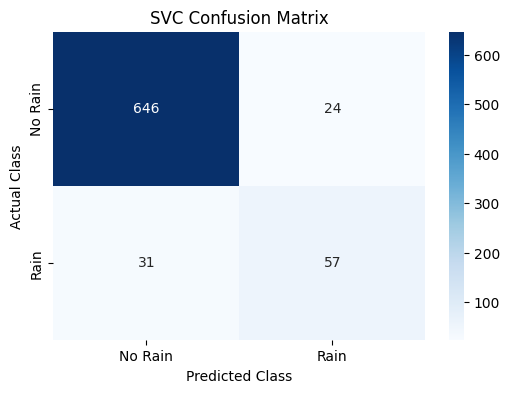

In [86]:
# Confusion Matrix megjelenítése
cm = confusion_matrix(y_test, svc_clf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title("SVC Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

### 3. modell:  K-Nearest Neighbors

Ebben az esetben is a skálázott bemeneti adatokkal dolgozunk. A ?-ek helyére írjuk be a hiányzó kódrészleteket.

In [87]:
# K-Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)
knn_pred = knn_clf.predict(X_test_scaled)

# K-Nearest Neighbors értékelése
print("K-Nearest Neighbors Metrics:")
print(f"  Accuracy: {accuracy_score(y_test, knn_pred):.2f}")
print(f"  Confusion Matrix:\n {confusion_matrix(y_test, knn_pred)}")
print(classification_report(y_test , knn_clf.predict(X_test_scaled)))

K-Nearest Neighbors Metrics:
  Accuracy: 0.96
  Confusion Matrix:
 [[653  17]
 [ 11  77]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       670
           1       0.82      0.88      0.85        88

    accuracy                           0.96       758
   macro avg       0.90      0.92      0.91       758
weighted avg       0.96      0.96      0.96       758



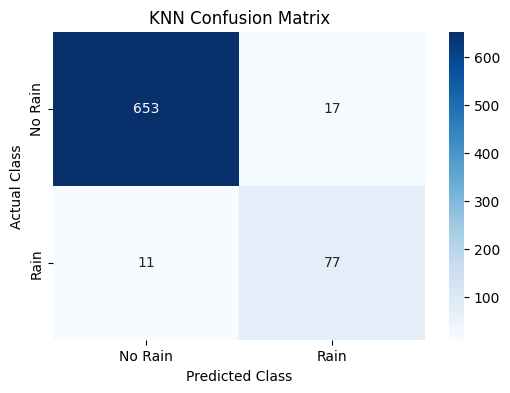

In [88]:
# Confusion Matrix megjelenítése
cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

### 4. modell: Gradient Boosting

Ebben az esetben is a skálázott bemeneti adatokkal dolgozunk. Az eredmény diagram megmutatja, hogy egy bemeneti változónak milyen a fontossága, vagyis, hogy arányosan mennyire járul hozzá a modell előrejelzéseihez.

A ? helyére írjuk be a hiányzó kódrészletet.

In [89]:
# Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_scaled, y_train)
gb_pred = gb_clf.predict(X_test_scaled)

# Evaluating Gradient Boosting
print("Gradient Boosting Metrics:")
print(f"  Accuracy: {accuracy_score(y_test, gb_pred):.2f}")
print(f"  Confusion Matrix:\n {confusion_matrix(y_test, gb_pred)}")
print(classification_report(y_test , gb_clf.predict(X_test_scaled)))

Gradient Boosting Metrics:
  Accuracy: 1.00
  Confusion Matrix:
 [[669   1]
 [  1  87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       670
           1       0.99      0.99      0.99        88

    accuracy                           1.00       758
   macro avg       0.99      0.99      0.99       758
weighted avg       1.00      1.00      1.00       758



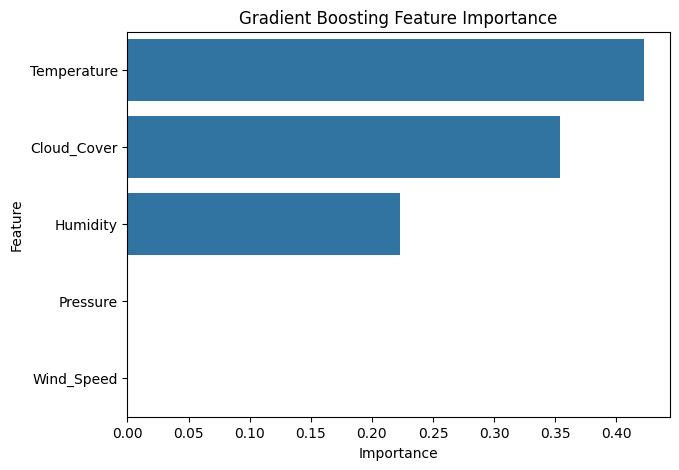

In [90]:
# Megjelenítjük a bemeneti jellemzők fontosságát (Feature Importance Plot)

# feature importances megállapítása
feature_importances = gb_clf.feature_importances_

# Készítünk egy DataFrame-et az ábrázoláshoz
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# feature importances megjelenítése sávdiagrammal
plt.figure(figsize=(7, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### 5. modell: Decision Tree Classifier

Ebben az esetben is a skálázott bemeneti adatokkal dolgozunk. A tanító fit() metódus alkalmazásakor a criterion = 'entropy' beállítással kiválasztjuk az alkalmazni kívánt döntési szabályt.

A ?-ek helyére írjuk be a hiányzó kódrészleteket.

In [91]:
# Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

dt_clf = DecisionTreeClassifier(criterion = 'entropy').fit(X_train_scaled, y_train)
y_pred = dt_clf.predict(X_test_scaled)

# Decision Tree Classifier értékelése
print("Decision Tree Classifier:")
print(f"  Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"  Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
print(classification_report(y_test , dt_clf.predict(X_test_scaled)))

Decision Tree Classifier:
  Accuracy: 1.00
  Confusion Matrix:
 [[670   0]
 [  0  88]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       670
           1       1.00      1.00      1.00        88

    accuracy                           1.00       758
   macro avg       1.00      1.00      1.00       758
weighted avg       1.00      1.00      1.00       758



[Text(0.3333333333333333, 0.875, 'x[1] <= 0.306\nentropy = 0.556\nsamples = 1767\nvalue = [1538, 229]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 1056\nvalue = [1056, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[3] <= 0.009\nentropy = 0.907\nsamples = 711\nvalue = [482.0, 229.0]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 348\nvalue = [348, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 0.316\nentropy = 0.95\nsamples = 363\nvalue = [134.0, 229.0]'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 229\nvalue = [0, 229]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 134\nvalue = [134, 0]')]

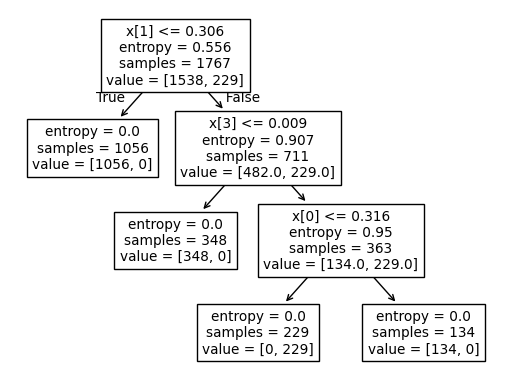

In [92]:
# A döntési fa megjelenítése
plot_tree(dt_clf)